In [25]:
import pandas as pd



In [26]:
df.columns


Index(['IncidentID', 'System', 'Severity', 'OpenedTime', 'ResolvedTime',
       'ResolutionMinutes', 'opened_date', 'opened_month', 'opened_hour'],
      dtype='object')

In [27]:
df["OpenedTime"] = pd.to_datetime(df["OpenedTime"])
df["ResolvedTime"] = pd.to_datetime(df["ResolvedTime"])


In [28]:
df["opened_date"] = df["OpenedTime"].dt.date
df["opened_month"] = df["OpenedTime"].dt.to_period("M")
df["opened_hour"] = df["OpenedTime"].dt.hour


In [29]:
incidents_by_day = (
    df.groupby("opened_date")
      .size()
      .reset_index(name="incident_count")
)

incidents_by_day.head()


,opened_date,incident_count
0,2024-01-01,1
1,2024-01-02,1
2,2024-01-03,1
3,2024-01-04,1
4,2024-01-05,1


In [30]:
mttr_by_day = (
    df.groupby("opened_date")["ResolutionMinutes"]
      .mean()
      .reset_index(name="avg_resolution_minutes")
)

mttr_by_day.head()


,opened_date,avg_resolution_minutes
0,2024-01-01,150.0
1,2024-01-02,150.0
2,2024-01-03,270.0
3,2024-01-04,330.0
4,2024-01-05,100.0


In [31]:
system_trends = (
    df.groupby("System")
      .agg(
          incident_count=("IncidentID", "count"),
          avg_mttr=("ResolutionMinutes", "mean")
      )
      .reset_index()
      .sort_values("avg_mttr", ascending=False)
)

system_trends


,System,incident_count,avg_mttr
1,Database,2,315.000000
0,CRM,2,180.000000
3,Website,3,176.666667
2,Email,3,100.000000


***Phase 3 — Time-Based Reliability Trends***

In this phase, I analyzed incident trends over time to evaluate operational stability and response efficiency.
By deriving date, month, and hour features from incident timestamps, I identified temporal patterns in incident frequency and resolution time. 
This analysis highlights periods of elevated operational risk and systems with persistently higher MTTR, providing actionable insight for reliability improvement and resource planning.

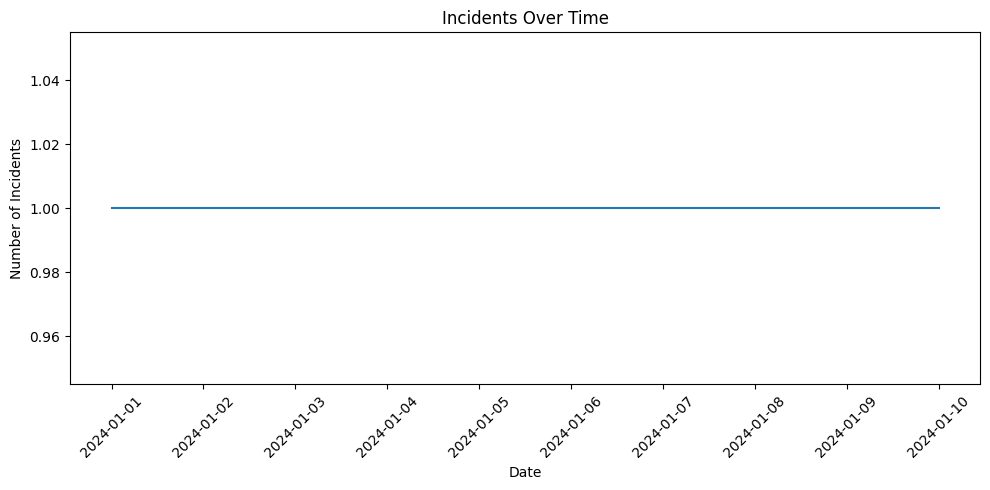

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(
    incidents_by_day["opened_date"],
    incidents_by_day["incident_count"]
)
plt.title("Incidents Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(
    "../visuals/incidents_over_time.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


**Incidents Over Time**

This chart tracks the total number of incidents occurring over time.

A flat or stable trend suggests consistent system performance, while upward trends may indicate increasing system instability or usage growth. Sudden spikes could be linked to deployments, outages, or infrastructure changes.

Monitoring incident volume over time helps teams measure reliability progress and detect emerging operational risks.


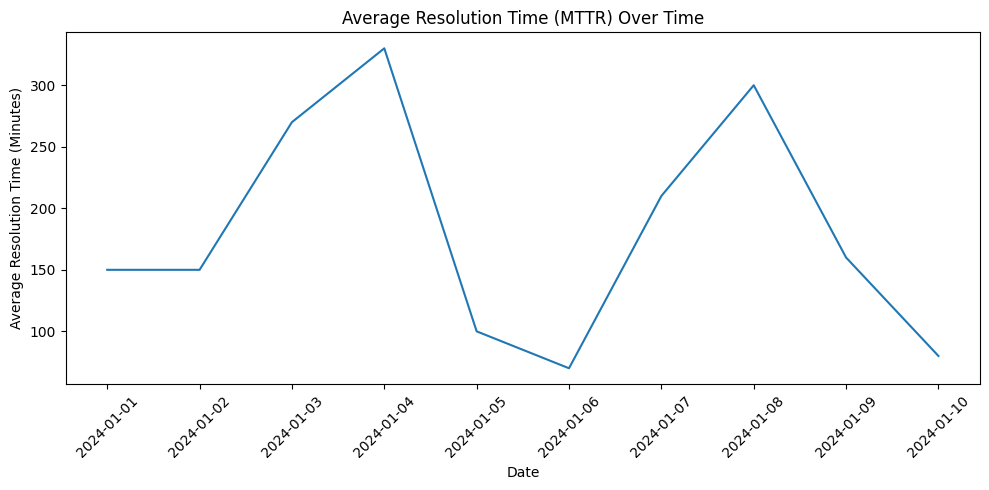

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(
    mttr_by_day["opened_date"],
    mttr_by_day["avg_resolution_minutes"]
)
plt.title("Average Resolution Time (MTTR) Over Time")
plt.xlabel("Date")
plt.ylabel("Average Resolution Time (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(
    "../visuals/incidents_by_MTTR.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


**Average Resolution Time (MTTR) Over Time**

This time-series chart tracks how average incident resolution time changes over the observed period.

Spikes in MTTR indicate days where incidents were more complex or response times were slower, possibly due to staffing constraints, system instability, or clustered high-severity incidents. Drops in MTTR suggest more efficient incident handling or lower-impact issues.

Analyzing MTTR trends over time helps identify operational bottlenecks, performance regressions, and opportunities to improve response consistency.


In [35]:
heatmap_data = (
    df.groupby(["opened_hour", "Severity"])
      .size()
      .unstack(fill_value=0)
)

heatmap_data


Severity,Critical,High,Low,Medium
opened_hour,,,,
7,0,0,1,0
8,0,1,0,0
9,0,0,0,2
10,0,0,0,1
11,0,1,0,0
13,0,1,0,0
14,1,0,0,0
16,0,0,1,0
18,1,0,0,0


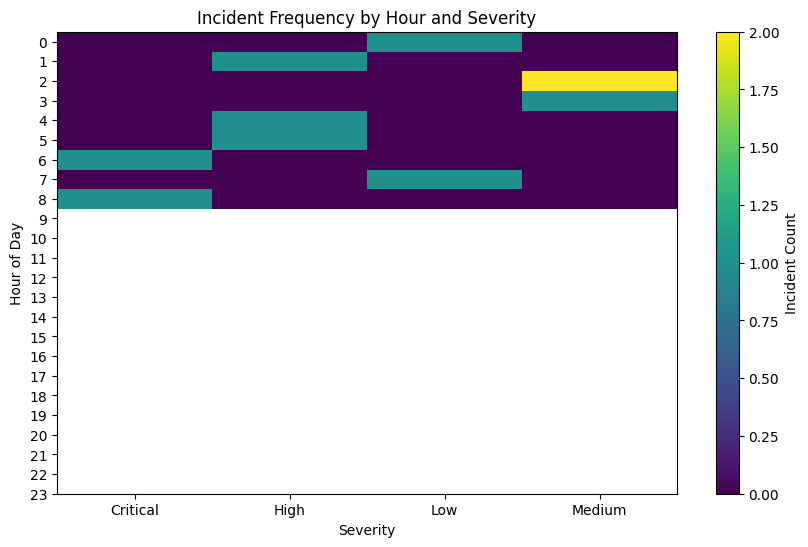

In [36]:
plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, aspect="auto")

plt.colorbar(label="Incident Count")
plt.title("Incident Frequency by Hour and Severity")
plt.xlabel("Severity")
plt.ylabel("Hour of Day")

plt.xticks(
    ticks=range(len(heatmap_data.columns)),
    labels=heatmap_data.columns
)
plt.yticks(
    ticks=range(24),
    labels=range(24)
)

plt.savefig(
    "../visuals/incidents_by_severity.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


**Incident Frequency by Hour and Severity**

This heatmap shows when incidents occur most frequently by hour of day and severity level.

Concentrated clusters indicate peak incident periods, which may correlate with system load, deployments, or business activity hours. Certain severity levels appearing at specific times may suggest staffing or monitoring gaps during off-hours.

Understanding temporal incident patterns supports better on-call scheduling, proactive monitoring, and resource allocation.
